In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle
import xgboost

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

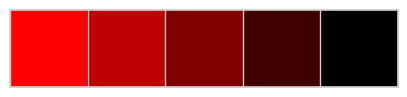

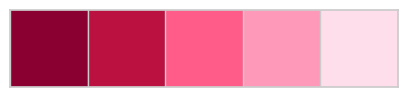

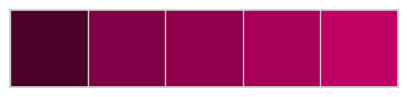

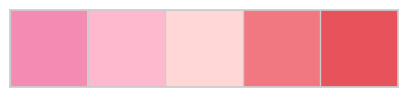

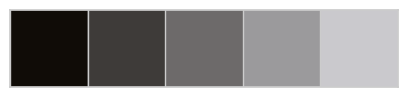

In [2]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

### Reading our data

In [4]:
df = pd.read_csv('heartnew.csv')
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'})

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0


In [5]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
df.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 1025
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1025 non-null   int64  
 1   Sex                      1025 non-null   int64  
 2   Chest pain type          1025 non-null   int64  
 3   BP                       1025 non-null   int64  
 4   Cholesterol              1025 non-null   int64  
 5   FBS over 120             1025 non-null   int64  
 6   EKG results              1025 non-null   int64  
 7   Max HR                   1025 non-null   int64  
 8   Exercise angina          1025 non-null   int64  
 9   ST depression            1025 non-null   float64
 10  Slope of ST              1025 non-null   int64  
 11  Number of vesse

*************************
.: Sex (Gender) Total :.
*************************


Sex
1    713
0    312
Name: count, dtype: int64

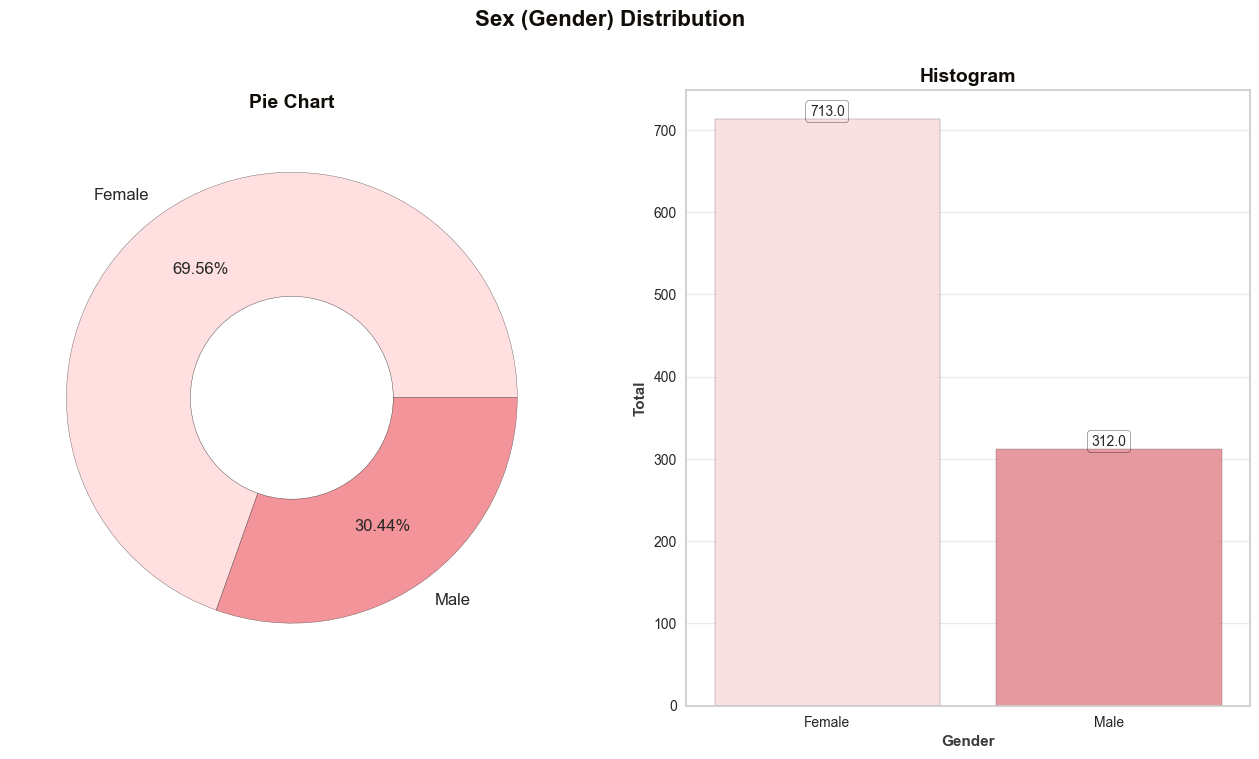

In [10]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[2:4]
labels=['Female', 'Male']
order=df['Sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['Sex'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Sex', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt
# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
df['Sex'].value_counts(dropna=False)

******************************
.: Chest Pain Type Total :.
******************************


Chest pain type
0    497
2    284
1    167
3     77
Name: count, dtype: int64

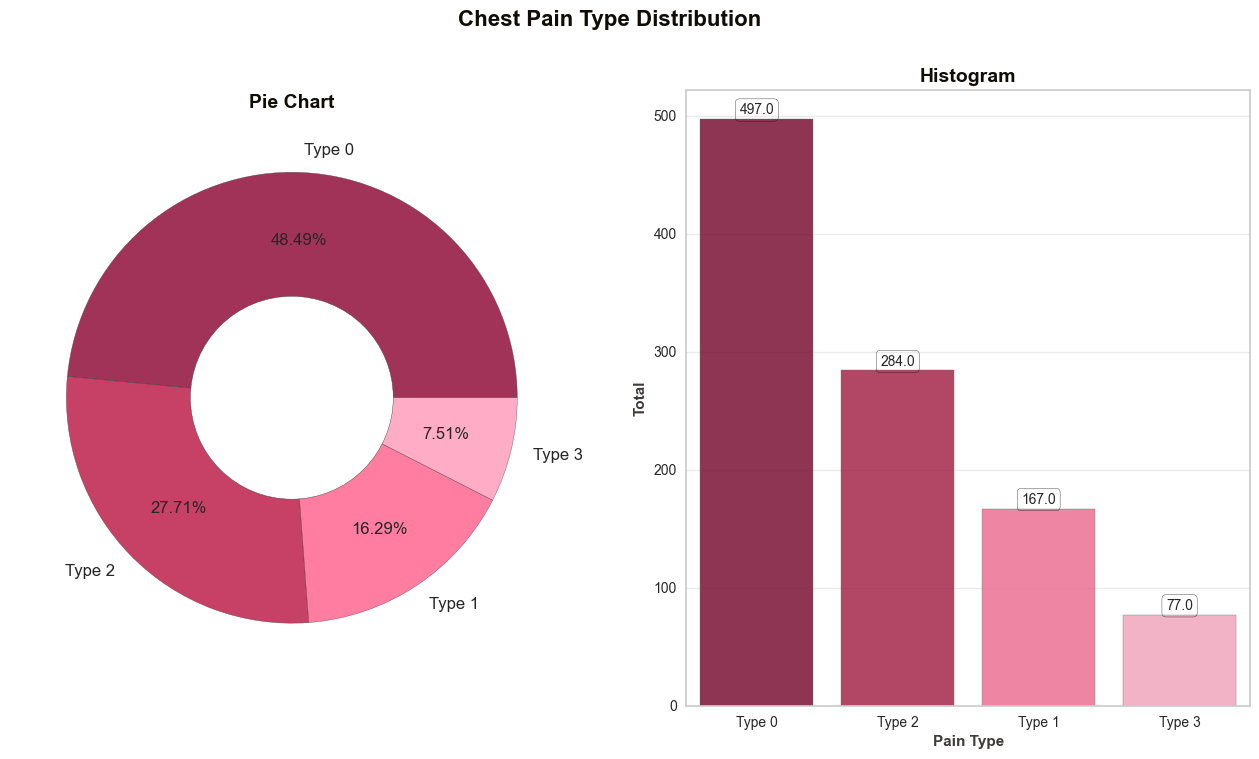

In [12]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[0:4]
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=df['Chest pain type'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['Chest pain type'].value_counts(), labels=labels, colors=colors, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]))
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='Chest pain type', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
df['Chest pain type'].value_counts(dropna=False)

********************************
.: Fasting Blood Sugar Total :.
********************************


FBS over 120
0    872
1    153
Name: count, dtype: int64

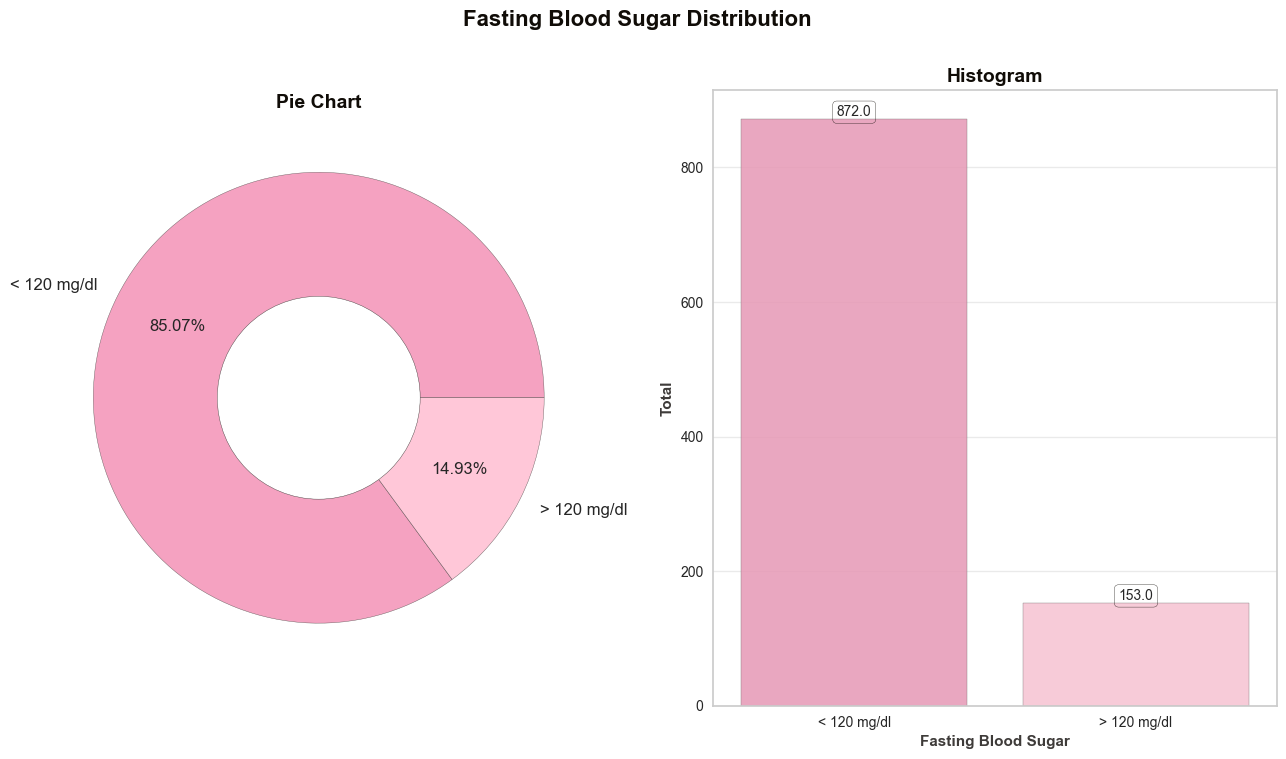

In [13]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[0:2]
labels=['< 120 mg/dl', '> 120 mg/dl']
order=df['FBS over 120'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['FBS over 120'].value_counts(), labels=labels, colors=colors,
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='FBS over 120', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt


# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 32)
print('\033[1m'+'.: Fasting Blood Sugar Total :.'+'\033[0m')
print('*' * 32)
df['FBS over 120'].value_counts(dropna=False)

**************************************************
.: Resting Electrocardiographic Results Total :.
**************************************************


EKG results
1    513
0    497
2     15
Name: count, dtype: int64

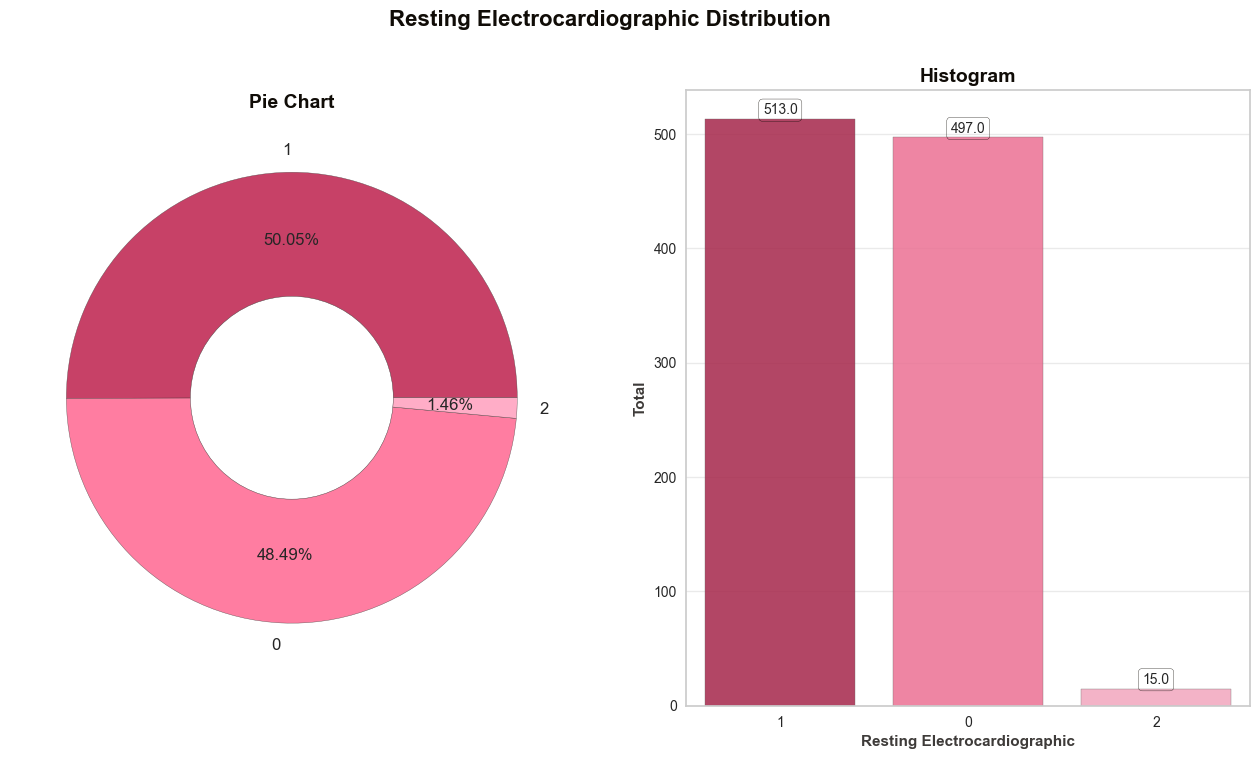

In [14]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[1:4]
labels=['1', '0', '2']
order=df['EKG results'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['EKG results'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='EKG results', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Resting Electrocardiographic', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 50)
print('\033[1m'+'.: Resting Electrocardiographic Results Total :.'+'\033[0m')
print('*' * 50)
df['EKG results'].value_counts(dropna=False)

***********************************
.: Exercise Induced Angina Total :.
***********************************


Exercise angina
0    680
1    345
Name: count, dtype: int64

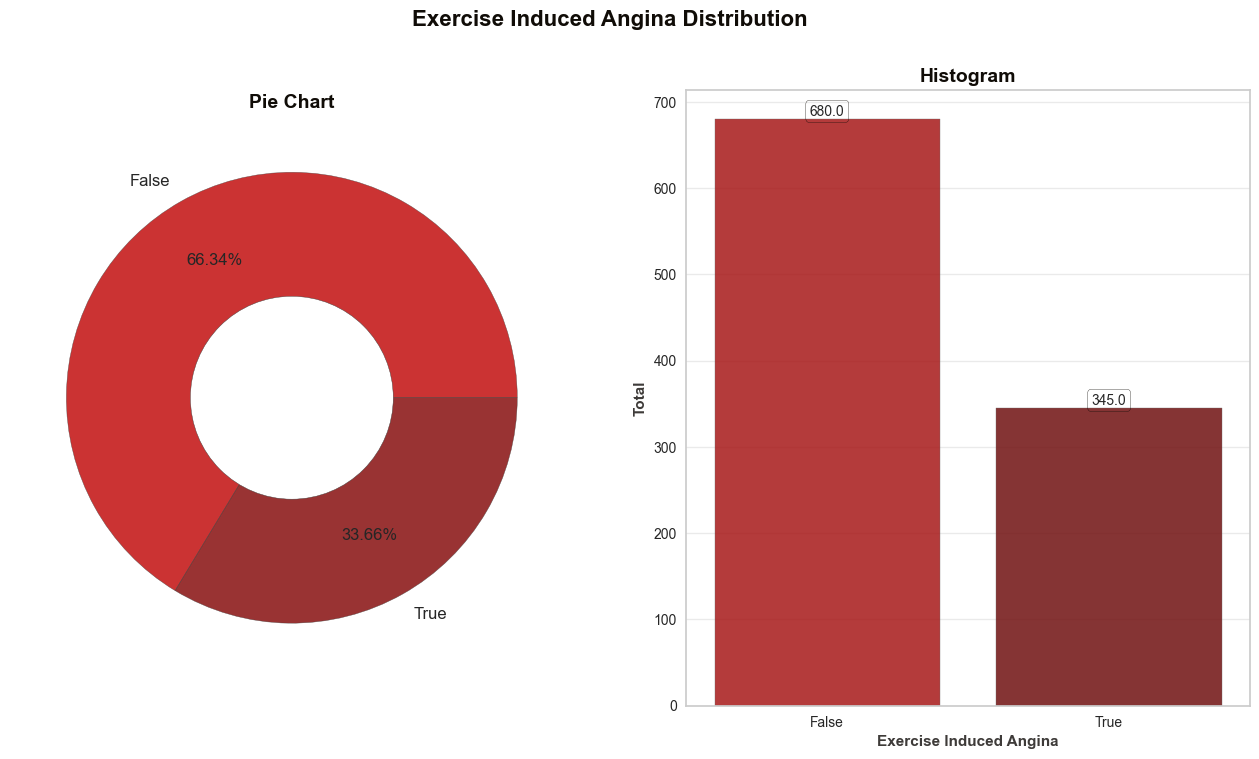

In [16]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[1:3]
labels=['False', 'True']
order=df['Exercise angina'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Exercise Induced Angina Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['Exercise angina'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='Exercise angina', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Exercise Induced Angina', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 35)
print('\033[1m'+'.: Exercise Induced Angina Total :.'+'\033[0m')
print('*' * 35)
df['Exercise angina'].value_counts(dropna=False)

********************
.: Slope Total :.
********************


Slope of ST
1    482
2    469
0     74
Name: count, dtype: int64

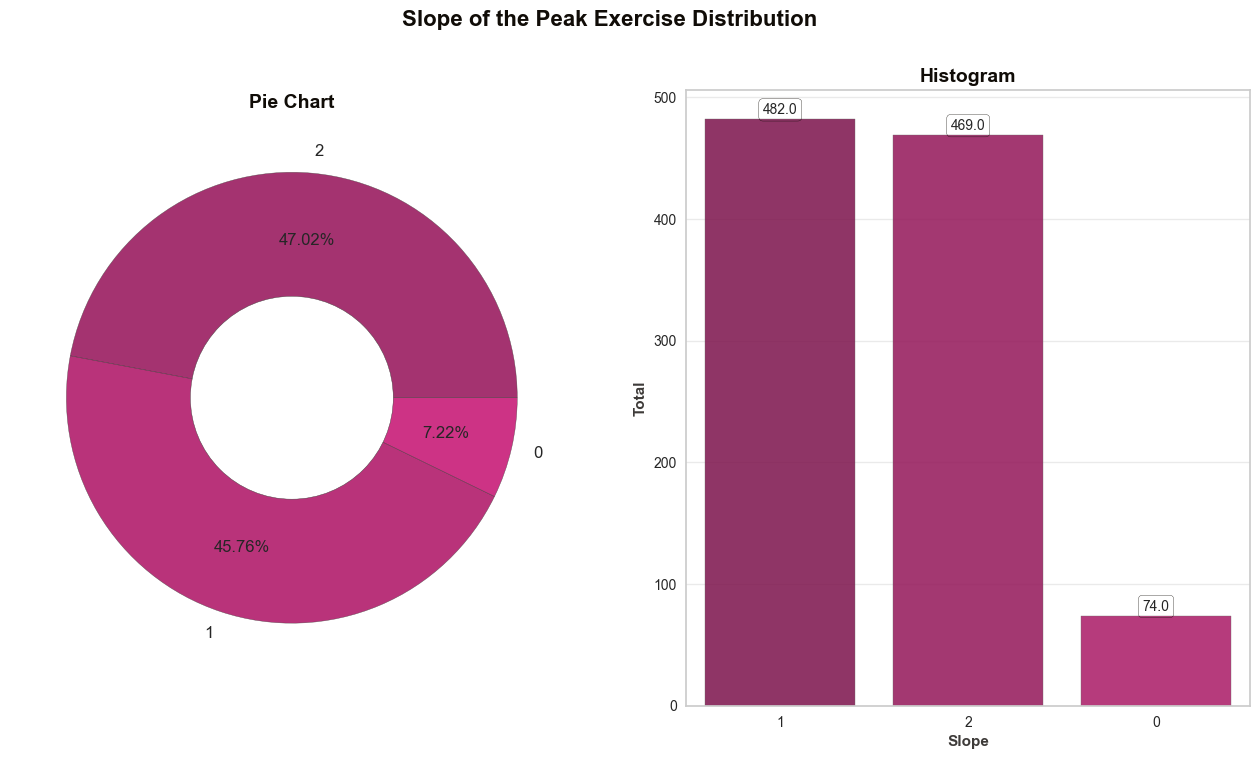

In [21]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad[2:5]
labels=['2', '1', '0']
order=df['Slope of ST'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Slope of the Peak Exercise Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['Slope of ST'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)


# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='Slope of ST', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Slope', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt
# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: Slope Total :.'+'\033[0m')
print('*' * 20)
df['Slope of ST'].value_counts(dropna=False)

****************************************
.: Number of Major Vessels Total :.
****************************************


Number of vessels fluro
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

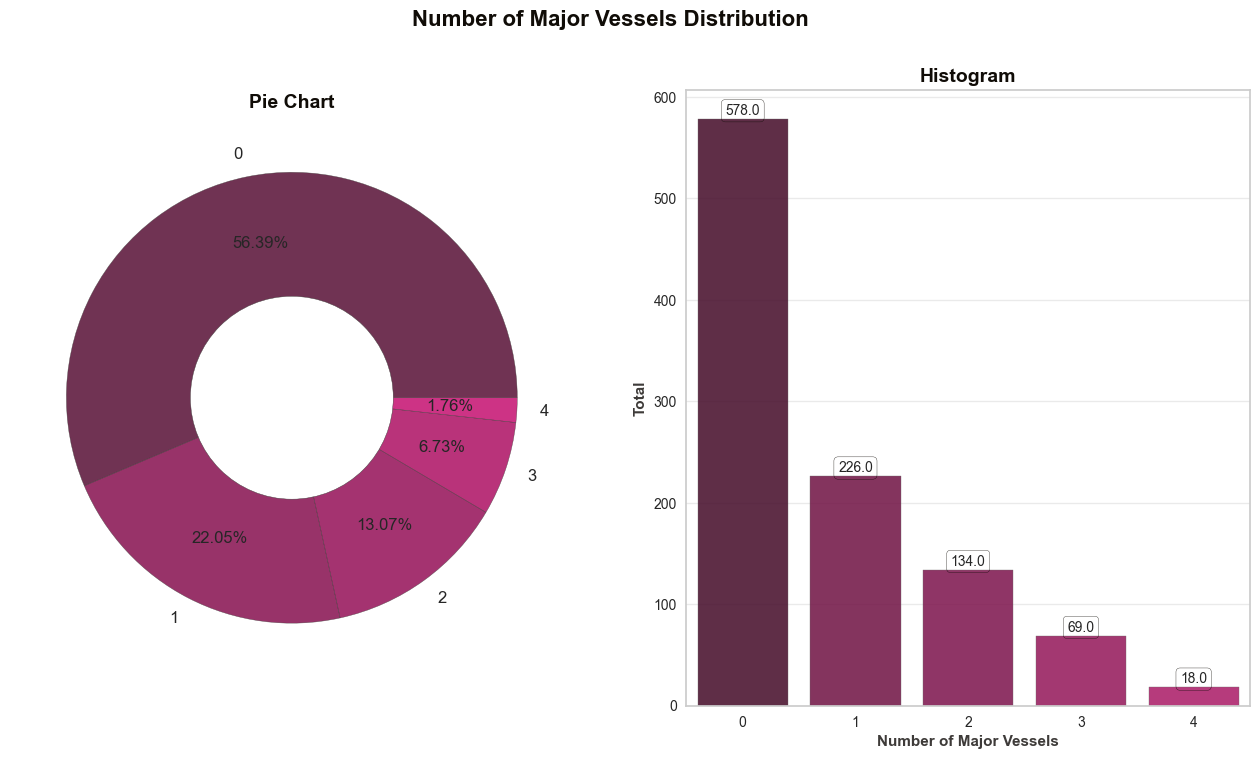

In [22]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad
labels=['0', '1', '2', '3', '4']
order=df['Number of vessels fluro'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Number of Major Vessels Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['Number of vessels fluro'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='Number of vessels fluro', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of Major Vessels', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 40)
print('\033[1m'+'.: Number of Major Vessels Total :.'+'\033[0m')
print('*' * 40)
df['Number of vessels fluro'].value_counts(dropna=False)

********************
.: "thal" Total :.
********************


Thallium
2    544
3    410
1     64
0      7
Name: count, dtype: int64

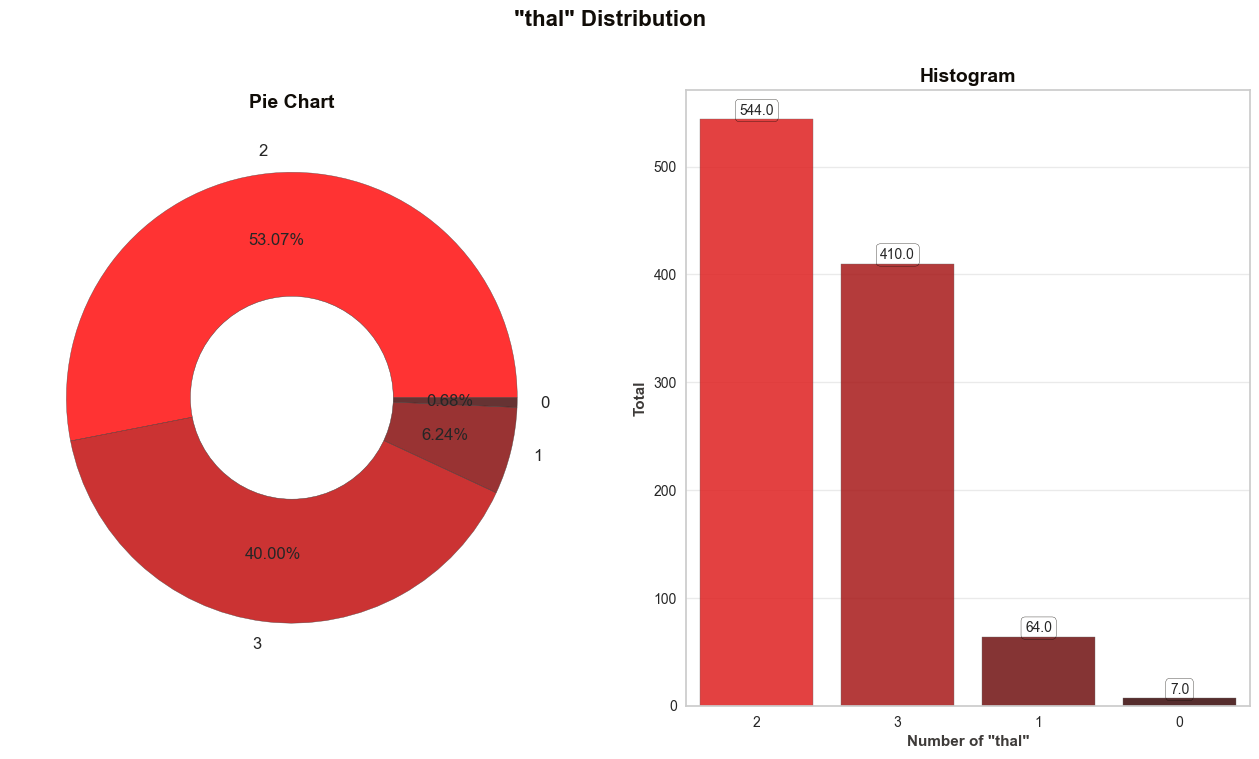

In [24]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[0:4]
labels=['2', '3', '1', '0']
order=df['Thallium'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('"thal" Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['Thallium'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='Thallium', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of "thal"', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: "thal" Total :.'+'\033[0m')
print('*' * 20)
df.Thallium.value_counts(dropna=False)

*********************************************
.: Heart Diseases Status (target) Total :.
*********************************************


Heart Disease
1    526
0    499
Name: count, dtype: int64

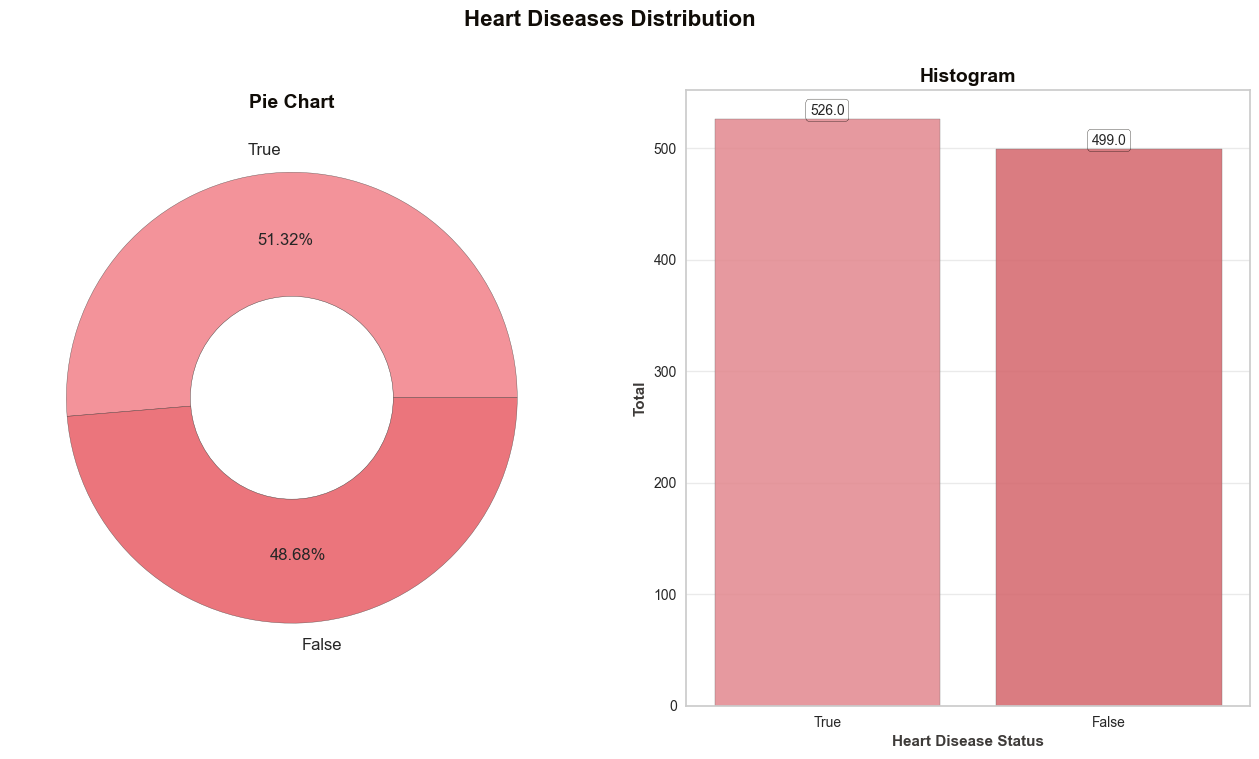

In [23]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[3:5]
labels=['True', 'False']
order=df['Heart Disease'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['Heart Disease'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='Heart Disease', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Heart Disease Status', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 45)
print('\033[1m'+'.: Heart Diseases Status (target) Total :.'+'\033[0m')
print('*' * 45)
df['Heart Disease'].value_counts(dropna=False)

In [25]:
# --- Descriptive Statistics ---
df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
Age,1025.000000,54.434146,9.072290,29.000000,48.000000,56.000000,61.000000,77.000000
Sex,1025.000000,0.695610,0.460373,0.000000,0.000000,1.000000,1.000000,1.000000
Chest pain type,1025.000000,0.942439,1.029641,0.000000,0.000000,1.000000,2.000000,3.000000
BP,1025.000000,131.611707,17.516718,94.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,1025.000000,246.000000,51.592510,126.000000,211.000000,240.000000,275.000000,564.000000
FBS over 120,1025.000000,0.149268,0.356527,0.000000,0.000000,0.000000,0.000000,1.000000
EKG results,1025.000000,0.529756,0.527878,0.000000,0.000000,1.000000,1.000000,2.000000
Max HR,1025.000000,149.114146,23.005724,71.000000,132.000000,152.000000,166.000000,202.000000
Exercise angina,1025.000000,0.336585,0.472772,0.000000,0.000000,0.000000,1.000000,1.000000
ST depression,1025.000000,1.071512,1.175053,0.000000,0.000000,0.800000,1.800000,6.200000


.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.249
Kurtosis: -0.526




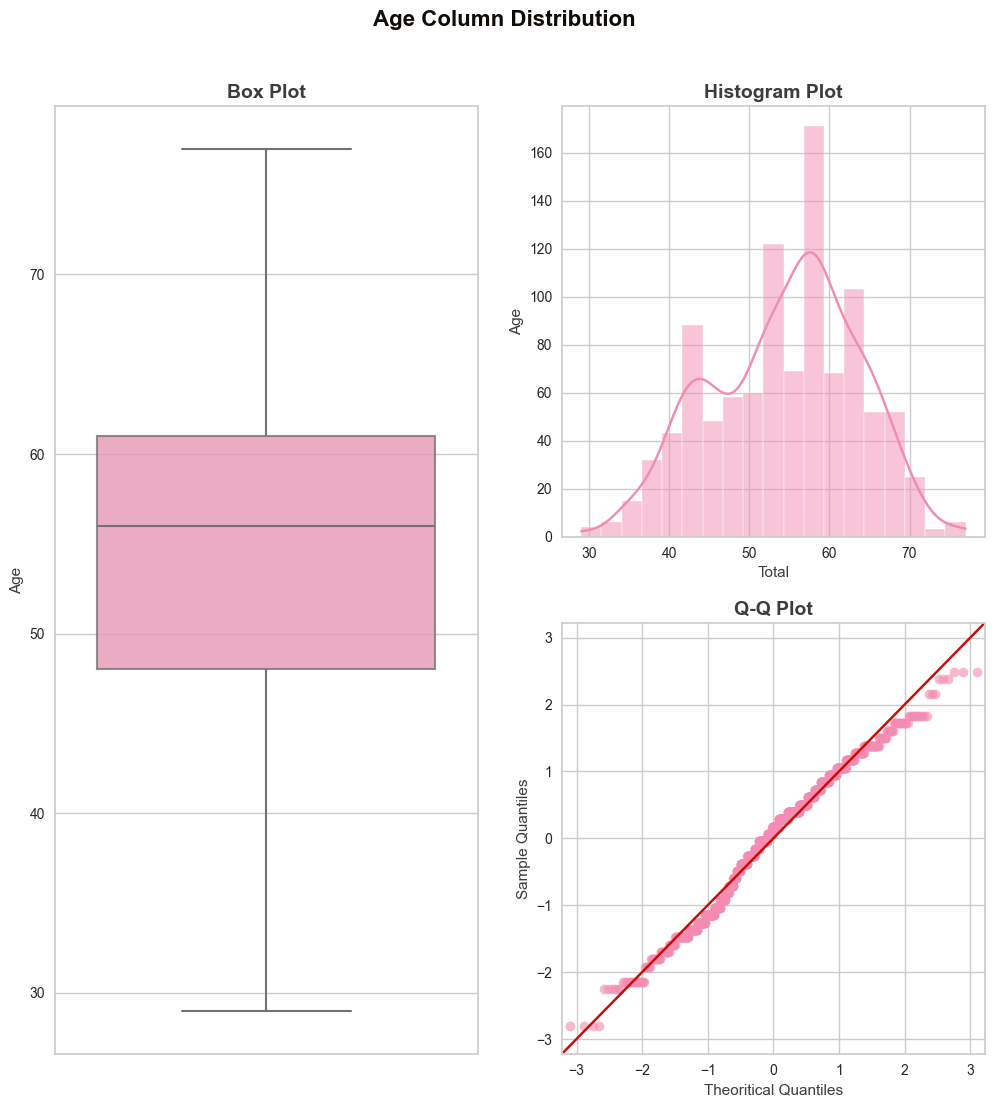

In [26]:
# --- Variable, Color & Plot Size ---
var = 'Age'
color = color_mix[0]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

plt.show()

.: Resting Blood Pressure Column Skewness & Kurtosis :.
*******************************************************
Skewness: 0.740
Kurtosis: 0.991




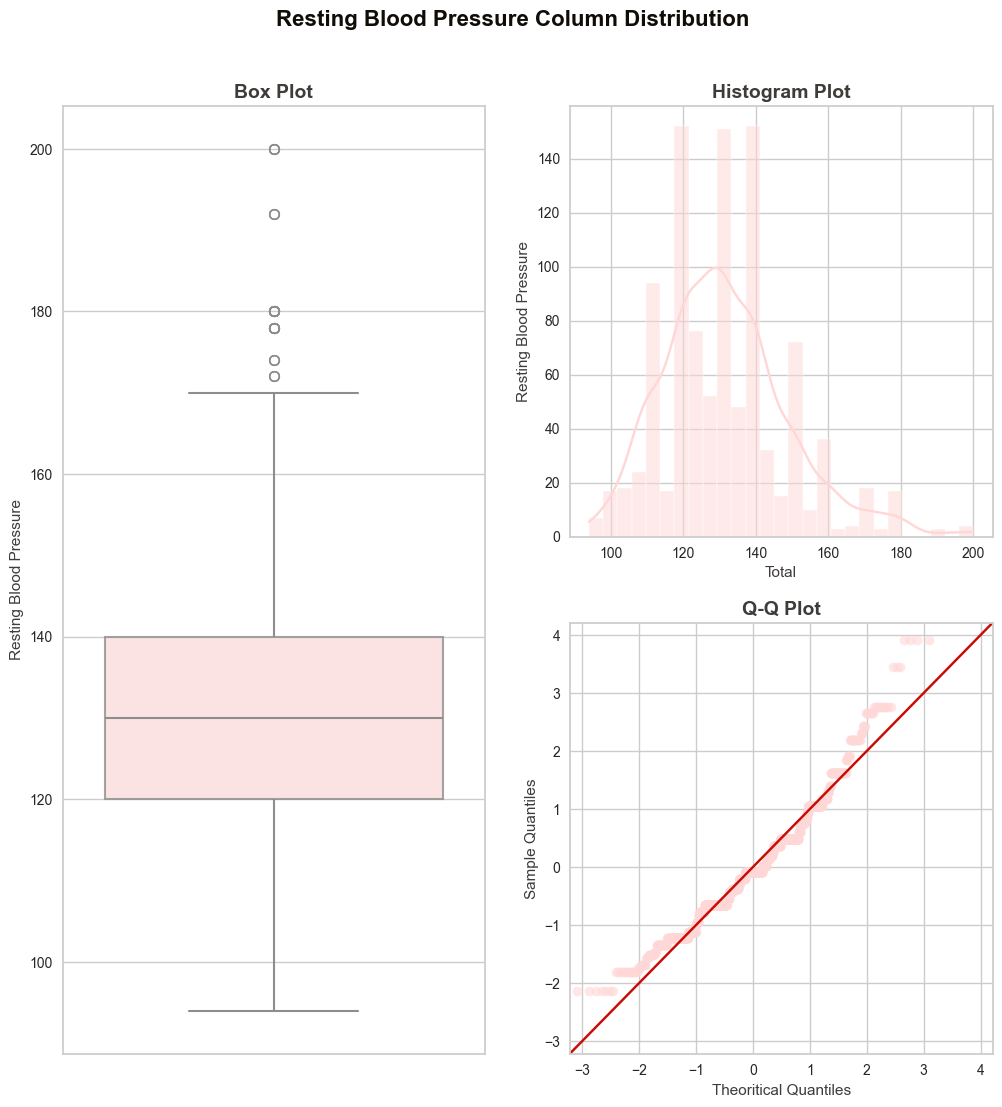

In [27]:
# --- Variable, Color & Plot Size ---
var = 'BP'
color = color_mix[2]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Resting Blood Pressure Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 55)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Resting Blood Pressure Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

.: Serum Cholestoral Column Skewness & Kurtosis :.
*********************************************
Skewness: 1.074
Kurtosis: 3.997




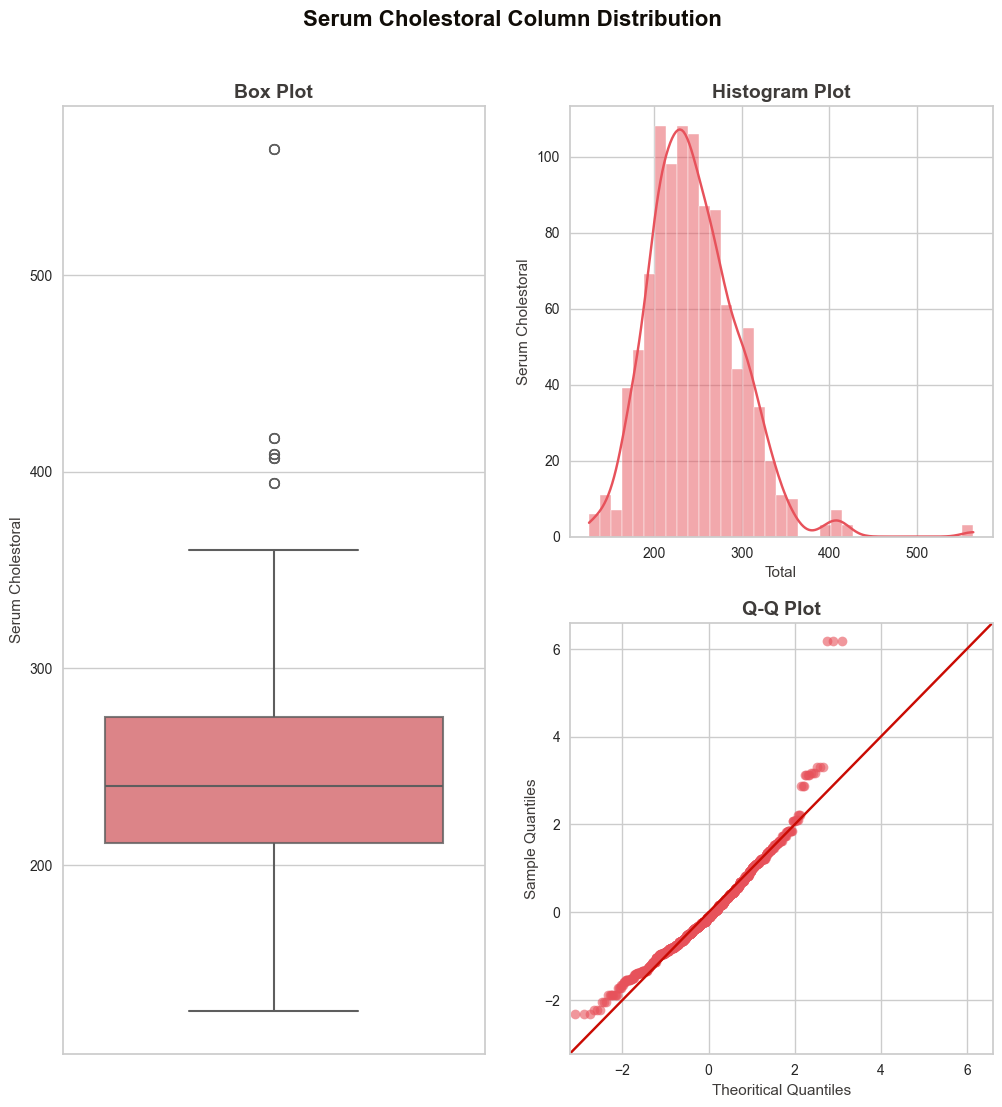

In [28]:
# --- Variable, Color & Plot Size ---
var = 'Cholesterol'
color = color_mix[4]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Serum Cholestoral Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 45)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Serum Cholestoral Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])
# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

.: Maximum Heart Rate Column Skewness & Kurtosis :.
**************************************************
Skewness: -0.514
Kurtosis: -0.089




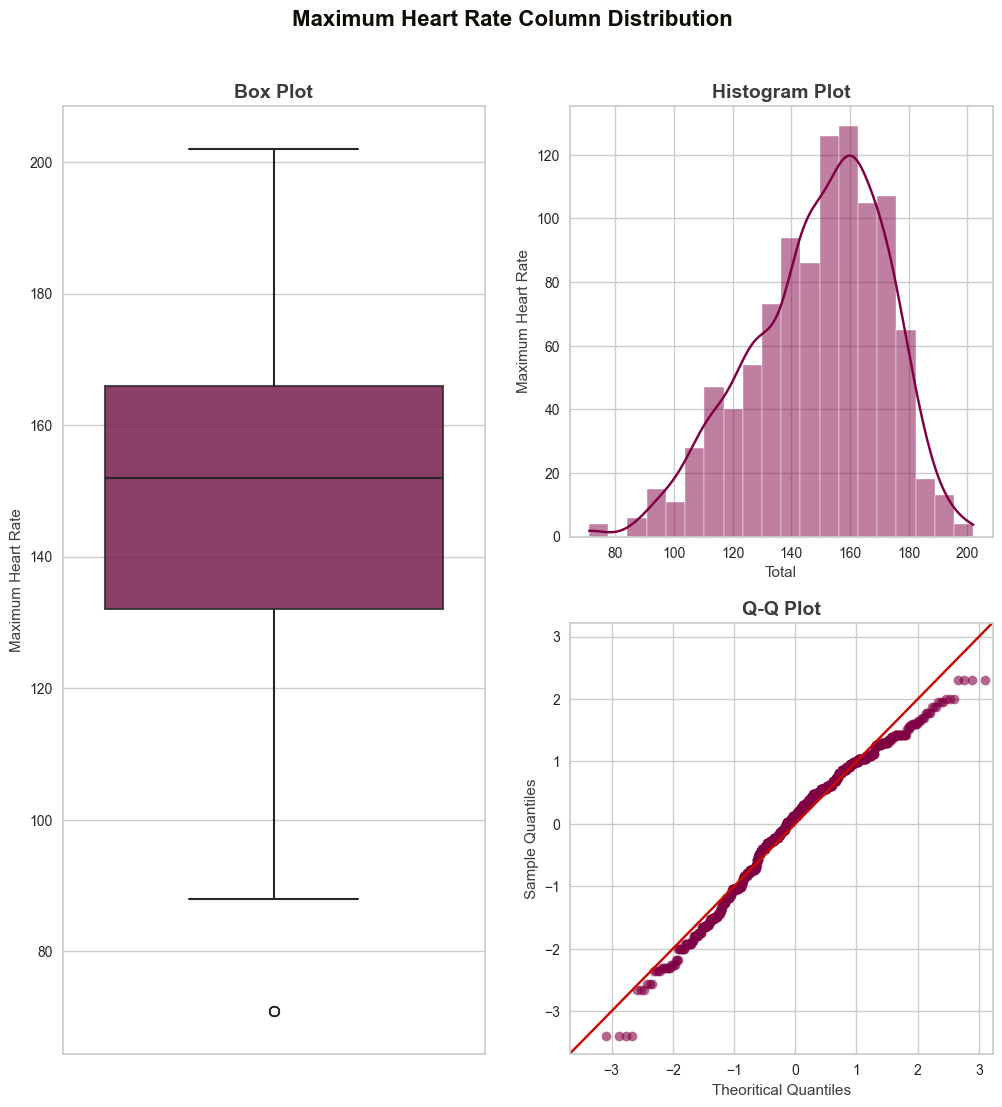

In [29]:
# --- Variable, Color & Plot Size ---
var = 'Max HR'
color = purple_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Maximum Heart Rate Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 50)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Maximum Heart Rate Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

.: "oldpeak" Column Skewness & Kurtosis :.
****************************************
Skewness: 1.211
Kurtosis: 1.314




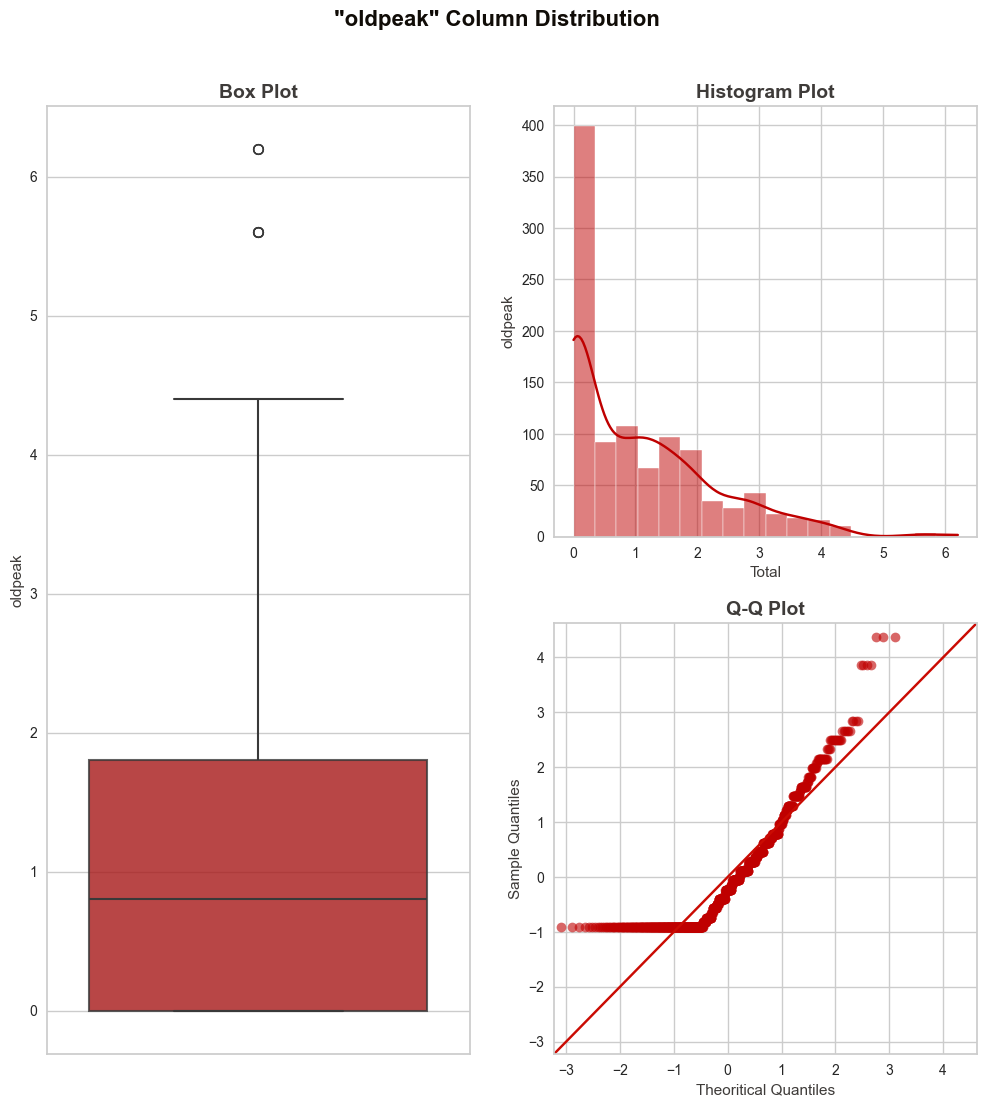

In [30]:
# --- Variable, Color & Plot Size ---
var = 'ST depression'
color = red_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: "oldpeak" Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('"oldpeak" Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('oldpeak', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color,
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('oldpeak', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

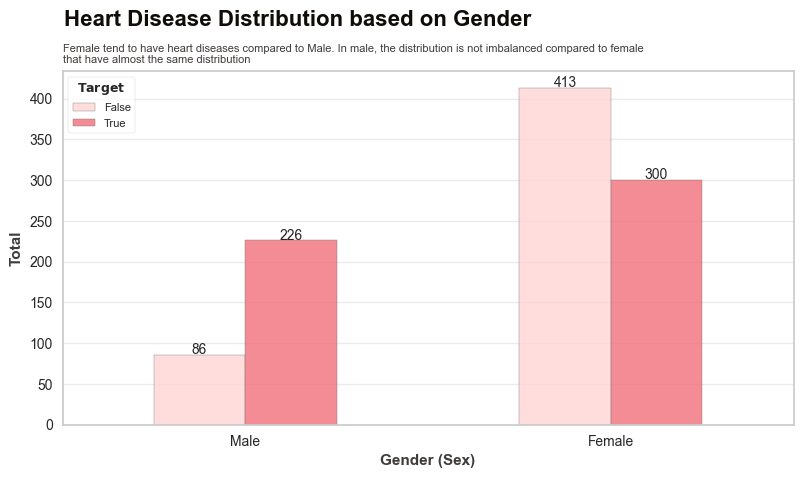

In [37]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.Sex, df['Heart Disease']).plot(kind='bar', figsize=(8, 5), 
                                         color=color_mix[2:4], 
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Female tend to have heart diseases compared to Male. In male, the distribution is not imbalanced compared to female\nthat have almost the same distribution', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

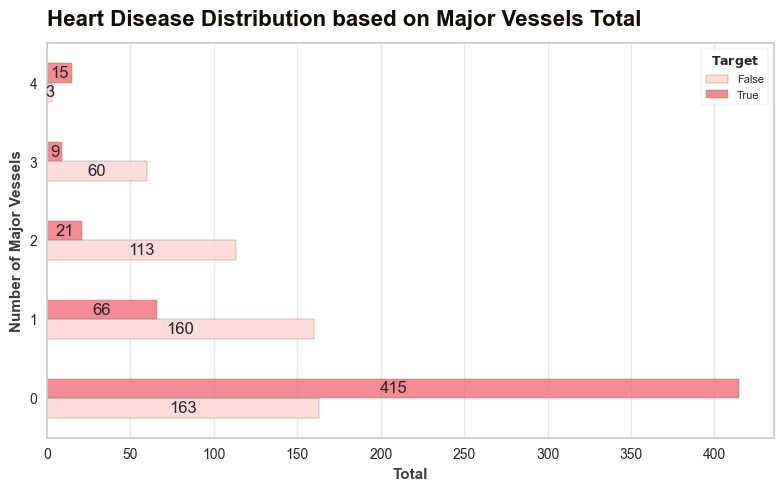

In [38]:
# --- Labels Settings ---
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(df['Number of vessels fluro'], df['Heart Disease']).plot(kind='barh', figsize=(8, 5), 
                                         color=color_mix[2:4],
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])

plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');

### Creating Features and Target dataframes

In [39]:
X = df.drop('Heart Disease',axis=1)
y = df['Heart Disease']

X.shape, y.shape

((1025, 13), (1025,))

### Select K best using Chi^2 test

#### USING FEATURE IMPORTANCE - This technique gives you a score for each feature of your data,the higher the score more relevant it is

In [40]:
ordered_rank_features = SelectKBest(score_func=chi2, k=13)
ordered_feature = ordered_rank_features.fit(X, y)

feat_imp = pd.DataFrame(ordered_feature.scores_,index=X.columns, columns=["Score"])
feat_imp.sort_values(by='Score',inplace=True,ascending=False)
feat_imp

,Score
Max HR,650.008493
ST depression,253.653461
Chest pain type,217.823922
Number of vessels fluro,210.625919
Exercise angina,130.470927
Cholesterol,110.723364
Age,81.425368
BP,45.974069
Slope of ST,33.673948
Sex,24.373650


### USING INFORMATION GAIN

In [41]:
mutual_info = mutual_info_classif(X, y)
mutual_info_df = pd.DataFrame(mutual_info*100, index=X.columns,columns=['Score'])
mutual_info_df.sort_values(by='Score',inplace=True,ascending=False)
mutual_info_df

,Score
Cholesterol,27.856038
Max HR,16.065645
ST depression,14.765300
Thallium,14.572928
Chest pain type,14.142954
Number of vessels fluro,12.928434
Slope of ST,8.546382
Exercise angina,8.459557
Age,8.058725
BP,6.328825


### FINAL SELECTION

In [42]:
final_selected_features = ['Age', 'Chest pain type', 'BP', 'Cholesterol', 'Max HR', 'ST depression','Number of vessels fluro','Thallium']
X = X[final_selected_features]
X.shape

(1025, 8)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

### Training RANDOM FOREST

In [44]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# random forest classifier accuracy:
y_preds = rfc.predict(X_test)
print("Accuracy : {:.2f}%".format(accuracy_score(y_test, y_preds)*100))

Accuracy : 95.02%


### Training XGBOOST

In [45]:
clf = xgboost.XGBClassifier()
clf.fit(X_train, y_train)

# xgboost classifier accuracy:
y_preds = clf.predict(X_test)
print("Accuracy : {:.2f}%".format(accuracy_score(y_test, y_preds)*100))

Accuracy : 96.32%
